In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

In [2]:
from path import Path
PROJ_DIR = Path().getcwd().parent
DATA_DIR = PROJ_DIR / "data"
INTERIM_DIR = DATA_DIR / "interim"
filename = INTERIM_DIR / "dataStand.csv"
print(filename)

C:\Users\matte\dmo_progetto\data\interim\dataStand.csv


In [3]:
ds = pd.read_csv(filename)
ds.head().T
ds.drop("Unnamed: 0", axis=1, inplace = True)

# Definizione dei metodi di clustering

In [4]:
def kmeans(dataset, k,method,RS=42 ):
    ds = dataset.copy()
    km = KMeans(n_clusters = k,init=method,random_state=RS)
    km.fit(ds)
    print("Valore SSE: ", km.inertia_)
    print("Numero di iterazioni", km.n_iter_)
    ds['cluster'] = km.labels_
    centroid = ds.groupby("cluster").mean()
    return centroid, ds
    

In [5]:
def c_hierarchic_scipy(dataset, method,fs=(30,23)):
    data_clustering = np.array(ds.iloc[:]) #trasforma le righe in array numpy
    labelList = range(0, len(data_clustering))
    linked = linkage(data_clustering, method) #esegue il clustering gerarchico
    plt.figure(figsize=fs)
    dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True) #visualizza il dendegogramma
    CPCC(linked, data_clustering, method)

In [6]:
def c_hierarchic_Sklearn(dataset, k, method):
    ac = AgglomerativeClustering(n_clusters=k, linkage=method)
    ac.fit(dataset) #adatta il modello ai dati
    return ac.labels_

In [7]:
#def c_hierarchic(dataset, method, k,fs=(30,23)):
    #c_hierarchic_Sklearn(dataset, k, method)
    #c_hierarchic_scipy(dataset, method,fs=(30,23)

In [8]:
def dbScan(dataset, eps, minPoints):
    ds = dataset.copy()
    dbscan = DBSCAN(eps=eps, min_samples= minPoints)
    clustering = dbscan.fit(ds)
    ds['cluster'] = dbscan.labels_
    print("clustering information ", clustering)
    return ds

# Definizione dei metodi di visualizzazione del clustering

In [9]:
def dataVizKmeans(var1, var2,centroidVar1, centroidVar2, labels, fs=(30,23)):
    plt.figure(figsize=fs)
    plt.scatter(var1, var2, c=labels, cmap='viridis') # mostra il risultato del clustering sulle scatter delle 2 variabili
    plt.scatter(centroidVar1, centroidVar2, linewidths=2, marker="+",s=300, c="black")
    plt.xlabel(var1.name)
    plt.ylabel(var2.name)
    plt.grid(True)


In [10]:
def dataVizHierach(var1, var2, labels, fs=(30,23)):
    plt.figure(figsize=fs)
    plt.scatter(var1, var2, c=labels, cmap='viridis') # mostra il risultato del clustering sulle scatter delle 2 variabili
    plt.xlabel(var1.name)
    plt.ylabel(var2.name)
    plt.grid(True)

In [11]:
def dataVizDBscan(ds, var1, var2, fs=(30,23)):
    plt.figure(figsize=fs)
    dbsclusters=dbscan[dbscan.cluster != -1]
    dbnoise=dbscan[dbscan.cluster == -1]
    plt.scatter(dbsclusters[var1], dbsclusters[var2], c=dbsclusters.cluster, cmap='viridis') # mostra il risultato del clustering sulle scatter delle 2 variabili
    plt.scatter(dbnoise[var1], dbnoise[var2], marker="X", s=300, c="red") # mostra il rumore
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(True)

In [12]:
def scatterWithPandas(series1, series2, series_color, gitter_scale=0.3):
    fig, ax = plt.subplots(figsize=(20, 10))
    if (gitter_scale):
        scatter = sns.scatterplot(x=series1 + np.random.normal(scale=gitter_scale, size=n_rows),
                        y=series2 + np.random.normal(scale=gitter_scale, size=n_rows),
                        hue=series_color,
                        sizes=0.01,
                        palette=["blue", "orange", "green", "red"],
                        alpha=0.7)
        scatter.set_title("Scatter Plot: {} vs {}".format(series1.name, series2.name))
        figure = scatter.get_figure()
        figure.savefig(PROJ_DIR / "outputs" / "plots" / "{}_{}_with_gitter_scatter.png".format(series1.name, series2.name))
    else:
        scatter = sns.scatterplot(x=series1,
                        y=series2,
                        hue=series_color,
                        sizes=0.01,
                        palette=["blue", "orange", "green", "red"],
                        alpha=0.7)
        scatter.set_title("Scatter Plot: {} vs {}".format(series1.name, series2.name))
        figure = scatter.get_figure()
        figure.savefig(PROJ_DIR / "outputs" / "plots" / "{}_{}_with_gitter_scatter.png".format(series1.name, series2.name))

# Definizione dei metodi di valutazione del clustering

In [13]:
def silhouette_Coefficient(dataset, k, method, Rs=42, fs=(30,23)):
    k_range = range(2,k)
    scores = []
    for i in k_range:
        km = KMeans(n_clusters = i,init=method,random_state=Rs)
        km.fit(dataset)
        scores.append(metrics.silhouette_score(dataset,km.labels_))

    #plt.figure(figsize=fs)
    plt.plot(k_range,scores)
    plt.title("Silhouette Coefficient")
    plt.xlabel("Numero di cluster")
    plt.ylabel("Valore del coefficiente di silhoutte")
    plt.grid(True)
    print("Il valore massimo del coefficiente di silhouette è ",max(scores))

In [14]:
def elbow_method(dataset, k, method, Rs=42, fs=(30,23)):
    k_range = range(2,k)
    scores = []
    for i in k_range:
        km = KMeans(n_clusters = i,init=method,random_state=Rs)
        km.fit(dataset)
        scores.append(km.inertia_) #inserisci nella lista l'SSE del cluster ottenuto
                 
    #plt.figure(figsize=fs)
    plt.plot(k_range,scores)
    plt.title("Elbow method")
    plt.xlabel("Numero di cluster")
    plt.ylabel("Valore del SSE")
    plt.grid(True)
    

In [15]:
def CPCC(clustering, data_clustering, method):
    cf, coph_dists = cophenet(clustering, pdist(data_clustering))
    print("Il valore del coefficiente  di correlazione di CoPhenetic per clustering gerarchico con il metodo ",method, " è ", cf);
    print("La matrice delle distanze del clustering è:\n", coph_dists)
    return cf, coph_dists


In [16]:
def findParamerDBScan(dataset,k_neighbors=4):
    nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(dataset)
    distances, indices = nbrs.kneighbors(dataset)
    distanceDec = sorted(distances[:,k_neighbors-1], reverse=True) #prendi l'ultima colonna e ordinala in senso decrescente
    plt.plot(indices[:,0], distanceDec)

# Analisi del dataset su tutte le variabili

In [17]:
ds.corr()

,Coorte,Genere,Voto_test,Crediti_totali,Scuola_provenienza,ASD,ARC,PRG,AN1,MDL,Voto_medio
Coorte,1.000000,0.084127,-0.341025,-0.125322,-0.017321,0.027483,-0.212488,-0.135111,0.014798,-0.166378,0.087581
Genere,0.084127,1.000000,0.053847,0.082491,-0.200789,-0.009696,0.053682,0.200033,0.014661,0.003733,-0.022805
Voto_test,-0.341025,0.053847,1.000000,0.373323,0.054645,0.245410,0.359815,0.349347,0.329787,0.358310,0.277146
Crediti_totali,-0.125322,0.082491,0.373323,1.000000,0.003125,0.778515,0.820977,0.798862,0.776612,0.761056,0.714418
Scuola_provenienza,-0.017321,-0.200789,0.054645,0.003125,1.000000,-0.032255,0.024174,-0.049025,0.075577,0.050168,-0.030979
ASD,0.027483,-0.009696,0.245410,0.778515,-0.032255,1.000000,0.552360,0.604092,0.520789,0.483626,0.802001
ARC,-0.212488,0.053682,0.359815,0.820977,0.024174,0.552360,1.000000,0.600641,0.568523,0.664489,0.443153
PRG,-0.135111,0.200033,0.349347,0.798862,-0.049025,0.604092,0.600641,1.000000,0.486039,0.542438,0.570419
AN1,0.014798,0.014661,0.329787,0.776612,0.075577,0.520789,0.568523,0.486039,1.000000,0.567920,0.644304
MDL,-0.166378,0.003733,0.358310,0.761056,0.050168,0.483626,0.664489,0.542438,0.567920,1.000000,0.437199


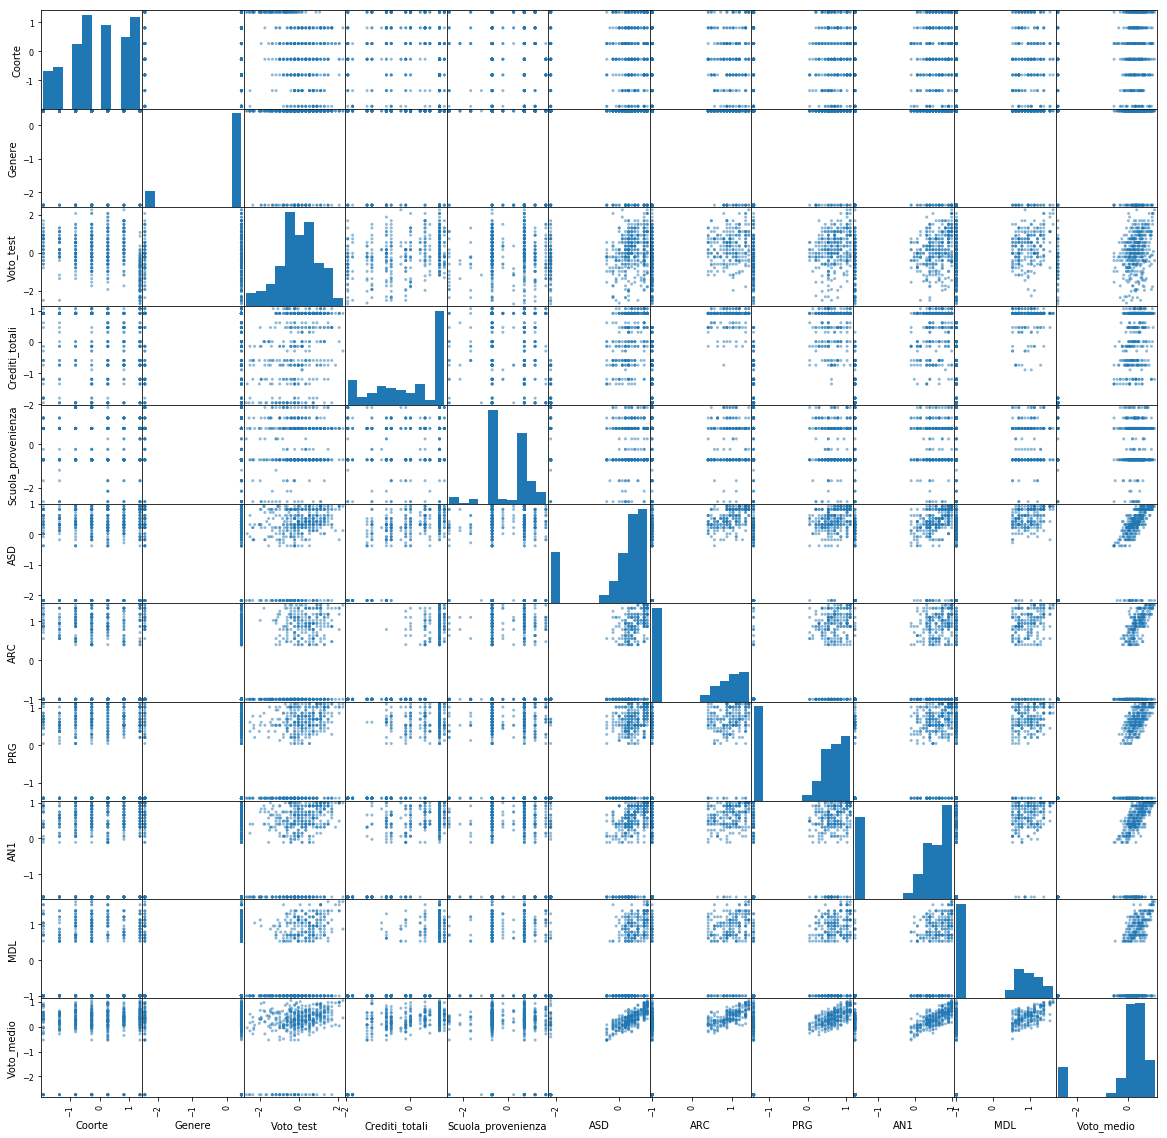

In [18]:
pd.scatter_matrix(ds, figsize=(20, 20))
plt.show()

## Clustering gerachico

### Metodo Average

Il valore del coefficiente  di correlazione di CoPhenetic per clustering gerarchico con il metodo  average  è  0.840163324564428
La matrice delle distanze del clustering è:
 [1.2186111  1.83032725 6.36170647 ... 1.33696514 2.11185419 2.11185419]


array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

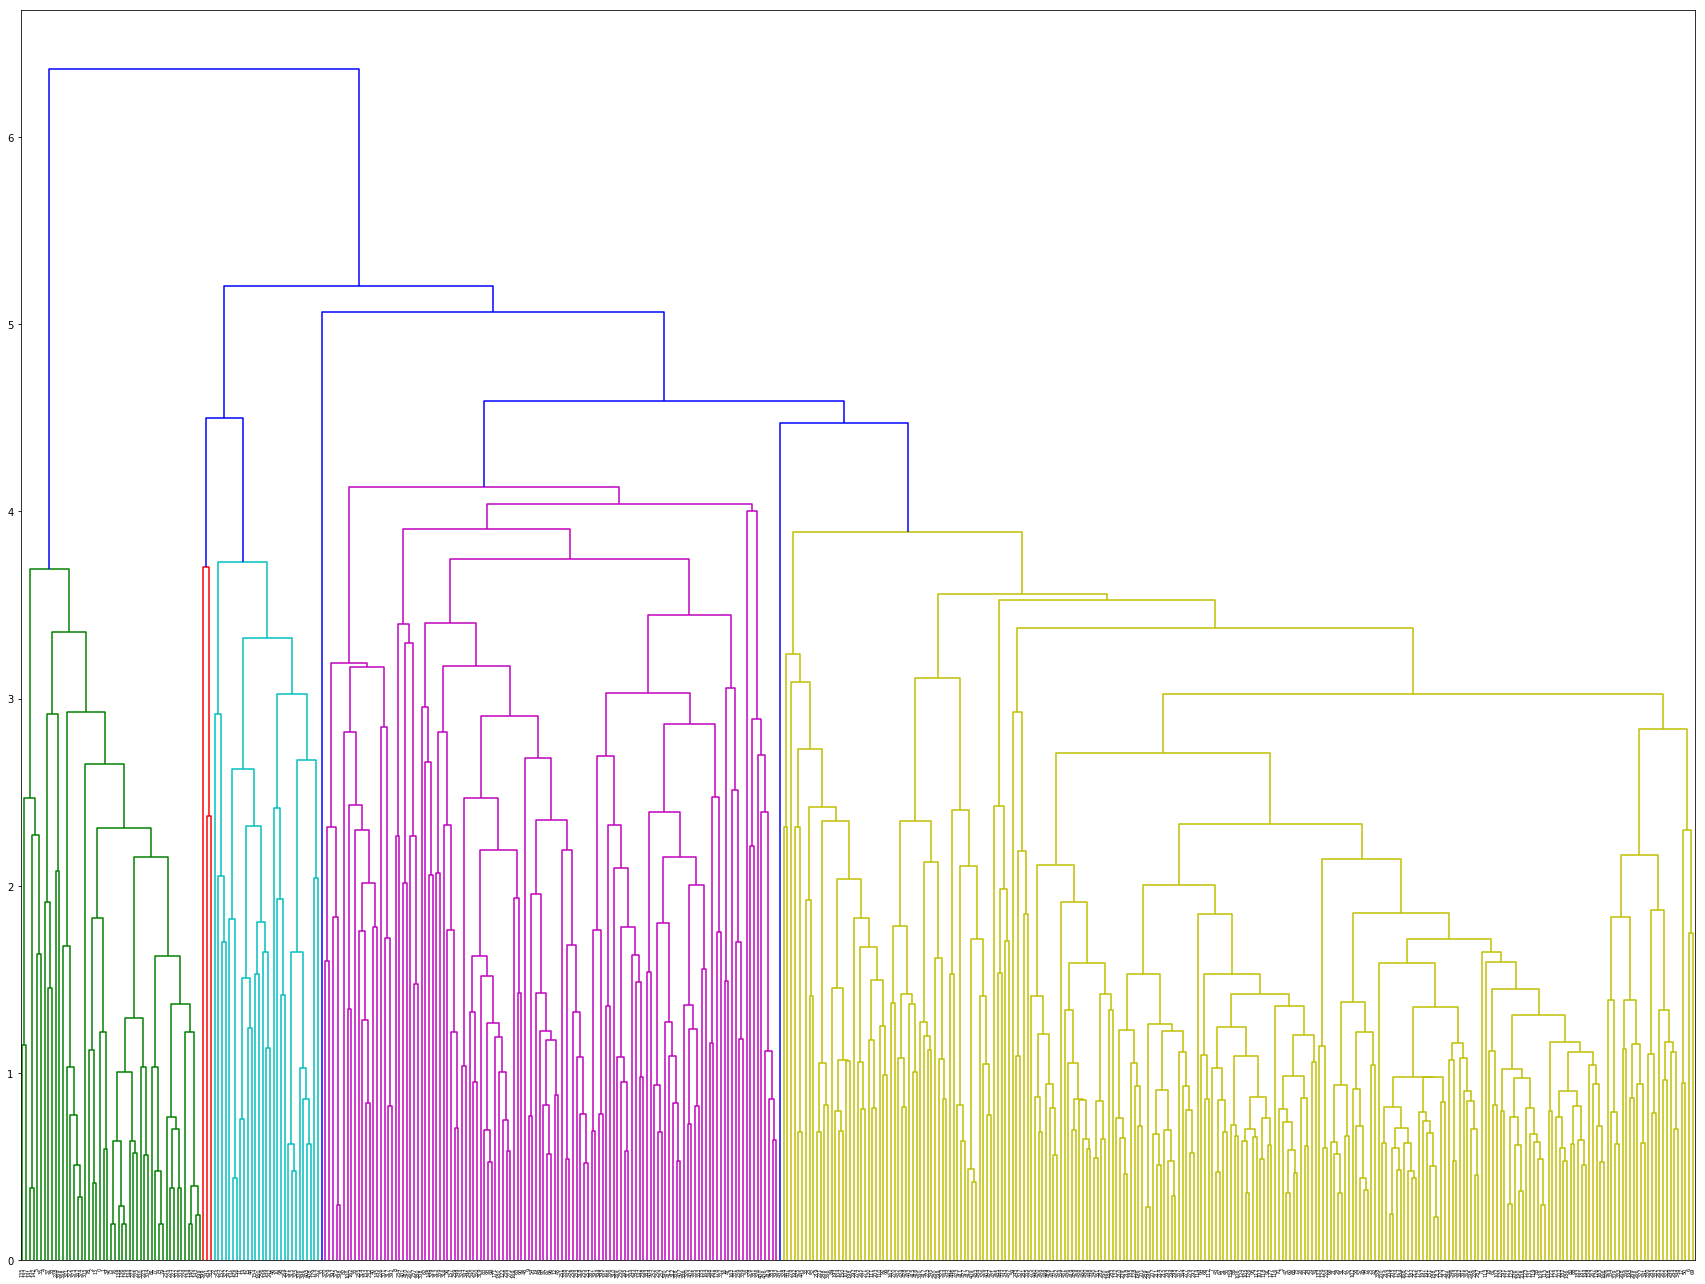

In [19]:
c_hierarchic_scipy(ds, "average",fs=(30,23))
c_hierarchic_Sklearn(ds, 4, "average")

# Analisi dei dati con un sottoinsieme di dati

In [20]:
#ds_clusterSchool = ds[["Voto_test", "ASD","ARC","PRG", "AN1", "MDL"]] #dataset 1
ds_clusterSchool = ds[["Voto_test", "Voto_medio", "Genere"]] #dataset 1

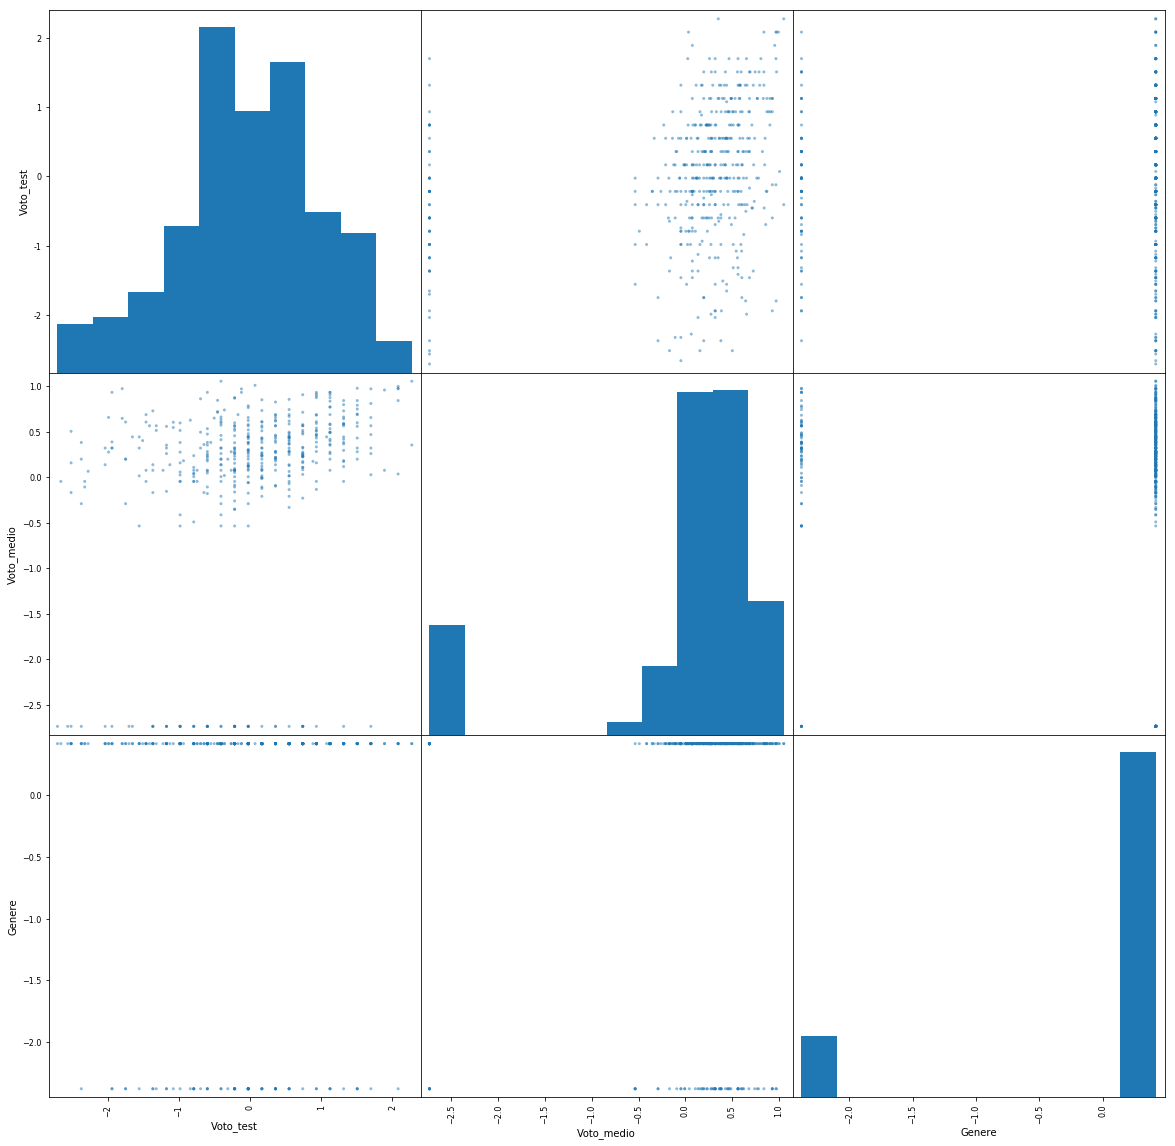

In [21]:
pd.scatter_matrix(ds_clusterSchool, figsize=(20, 20))
plt.show()

In [22]:
data_clusteringSchool = np.array(ds_clusterSchool.iloc[:])
labelList = range(0, len(data_clusteringSchool))

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [73.75, 73.75, 120.0, 120.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [180.0, 180.0, 204.375, 204.375],
  [152.5, 152.5, 192.1875, 192.1875],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [355.0, 355.0, 3

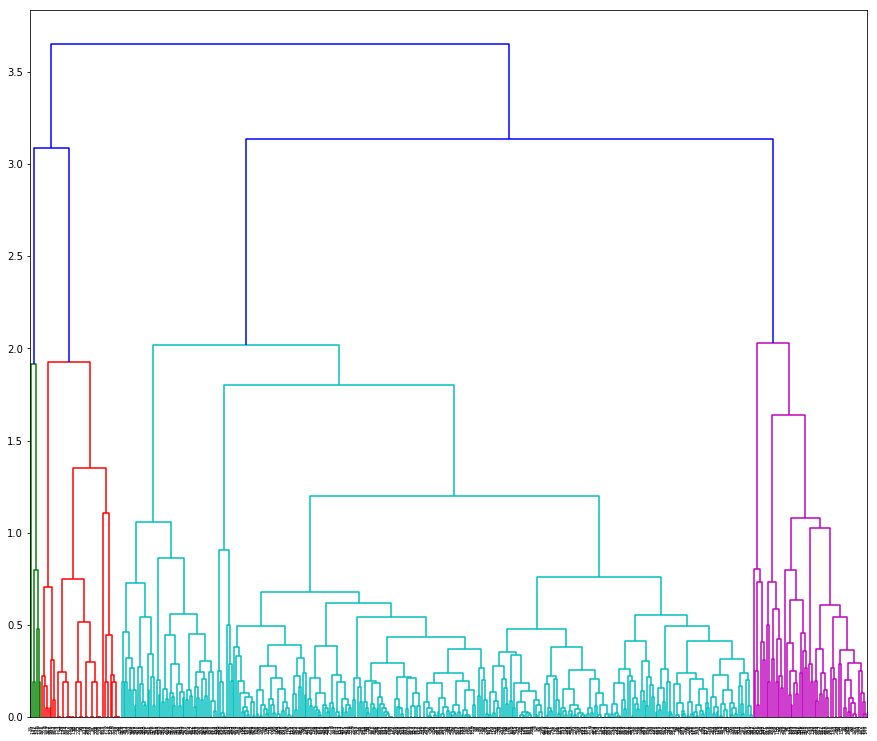

In [23]:
linked = linkage(data_clusteringSchool, 'average') #esegue il clustering gerarchico
labelList = range(0, len(data_clusteringSchool))
plt.figure(figsize=(15, 13))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True) #visualizza il dendegogramma

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [115.0, 115.0, 133.75, 133.75],
  [92.5, 92.5, 124.375, 124.375],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [172.5, 172.5, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [240.0, 240.0, 267.5, 267.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390

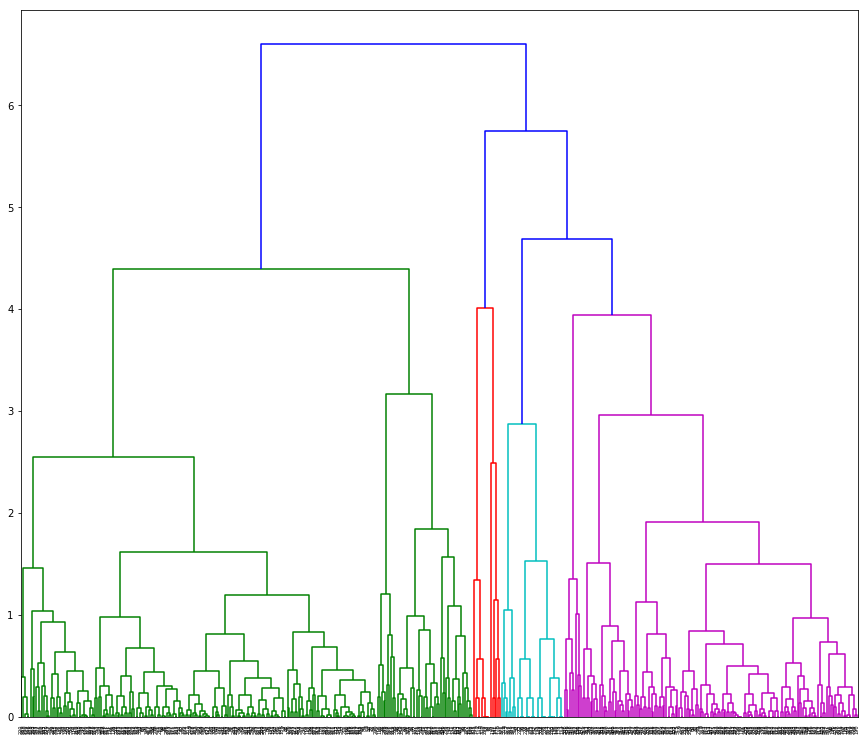

In [24]:
linked = linkage(data_clusteringSchool, 'complete') #esegue il clustering gerarchico
labelList = range(0, len(data_clusteringSchool))
plt.figure(figsize=(15, 13))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True) #visualizza il dendegogramma

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [121.25, 121.25, 170.0, 170.0],
  [73.75, 73.75, 145.625, 145.625],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [235.0, 235.0, 254.375, 254.375],
  [212.5, 212.5, 244.6875, 244.6875],
  [195.0, 195.0, 228.59375, 228.59375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [3

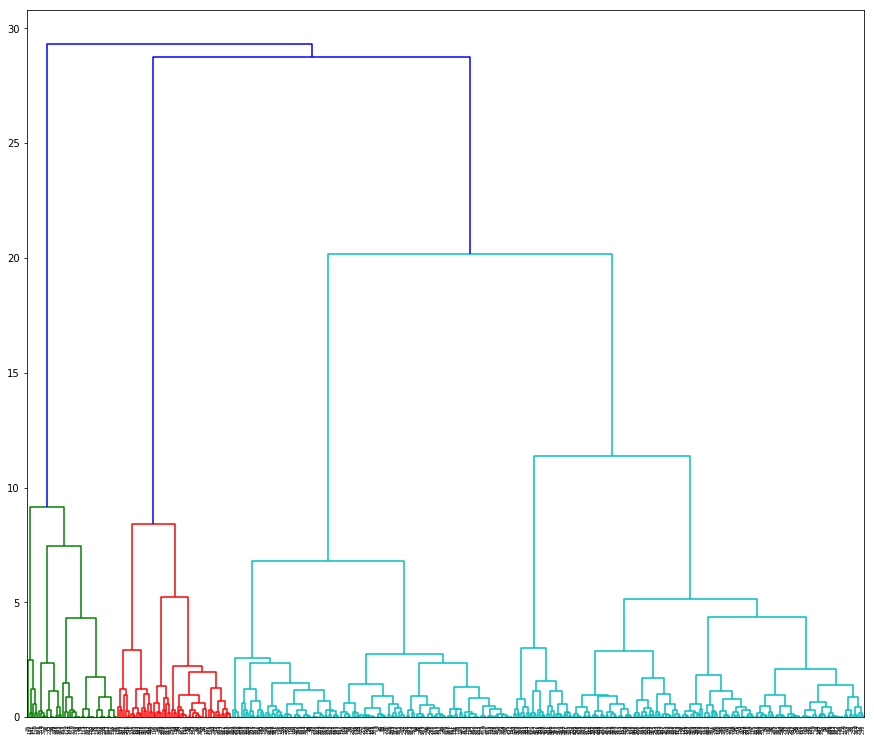

In [25]:
linked = linkage(data_clusteringSchool, 'ward') #esegue il clustering gerarchico
labelList = range(0, len(data_clusteringSchool))
plt.figure(figsize=(15, 13))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True) #visualizza il dendegogramma

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [112.5, 112.5, 140.0, 140.0],
  [95.0, 95.0, 126.25, 126.25],
  [85.0, 85.0, 110.625, 110.625],
  [70.0, 70.0, 97.8125, 97.8125],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [385.0, 385.0, 395.0, 395.0],
  [405.0, 405.0, 415.0, 415.0],
  [435.0, 435.0, 445.0, 445.0],
  [425.0, 425.0, 440.0, 440.0],
  [410.0, 410.0, 432.5, 432.5],
  [390.0, 390.0, 421.25, 421.25],
  [375.0, 375.0, 405.625, 405.625],
  [365.0, 365.0, 390.3125, 390.3125],
  [465.0, 465.0, 475.0, 475.0],
  [495.0, 495.0, 505.0, 505.0],
  [515.0, 515.0, 525.0, 525.

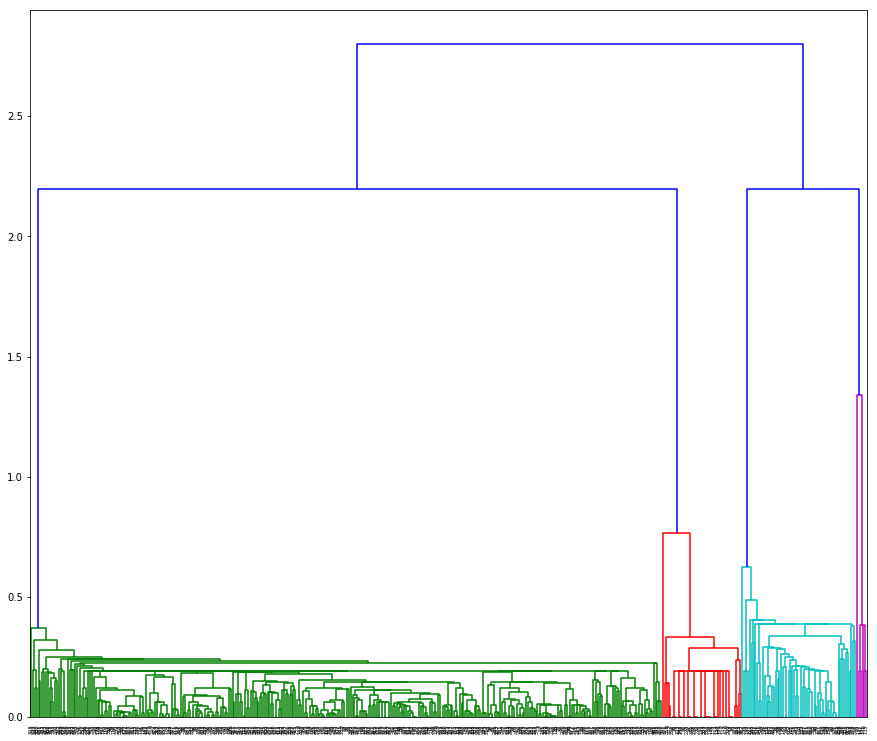

In [26]:
linked = linkage(data_clusteringSchool, 'single') #esegue il clustering gerarchico
labelList = range(0, len(data_clusteringSchool))
plt.figure(figsize=(15, 13))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True) #visualizza il dendegogramma

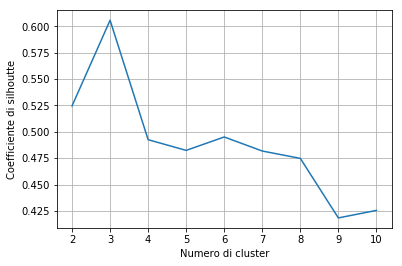

In [27]:
k_range = range(2,11)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k,init="k-means++",random_state=42)
    km.fit(ds_clusterSchool)
    scores.append(metrics.silhouette_score(ds_clusterSchool,km.labels_))
    
plt.plot(k_range,scores)
plt.xlabel("Numero di cluster")
plt.ylabel("Coefficiente di silhoutte")
plt.grid(True)

In [28]:
km = KMeans(n_clusters = 3,init="k-means++",random_state=42)
km.fit(ds_clusterSchool)
print(metrics.silhouette_score(ds_clusterSchool,km.labels_))
ds_clusterSchool['cluster'] = km.labels_
centers = ds_clusterSchool.groupby("cluster").mean()


0.6057662845416723


In [29]:
centers

,Voto_test,Voto_medio,Genere
cluster,,,
0,0.103575,0.333028,0.420266
1,-0.579740,-2.734545,0.077444
2,-0.113150,0.324148,-2.379446


Text(0, 0.5, 'Voto_medio')

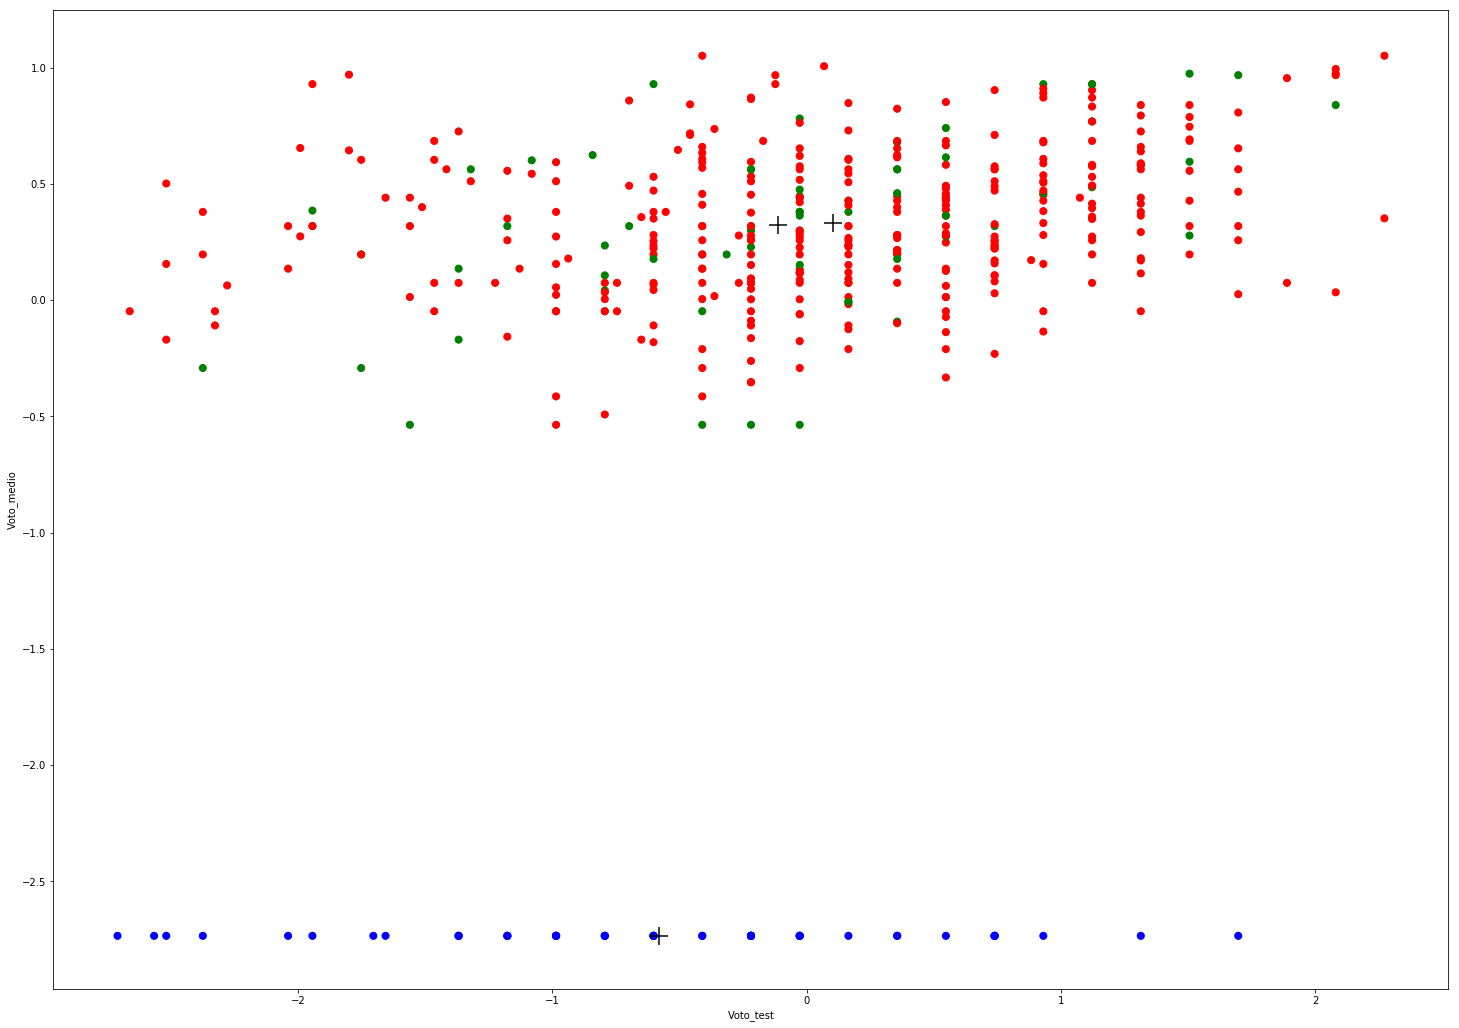

In [30]:
X = ds_clusterSchool.Voto_test
Y = ds_clusterSchool.Voto_medio
#colors = np.array(["red","blue","green", "Yellow", "Pink","Brown","Grey"])
colors = np.array(["red","blue","green"])
#plt.scatter(ds.Voto_test, ds.AN1, c=colors[list(ds.cluster)], s=50)
plt.figure(figsize=(25,18))
plt.scatter(X, Y, c=colors[list(ds_clusterSchool.cluster)], s=50)
plt.scatter(centers.Voto_test, centers.Voto_medio, linewidths=3, marker="+",s=300, c="black")
plt.xlabel("Voto_test")
plt.ylabel("Voto_medio")

Text(0, 0.5, 'Genere')

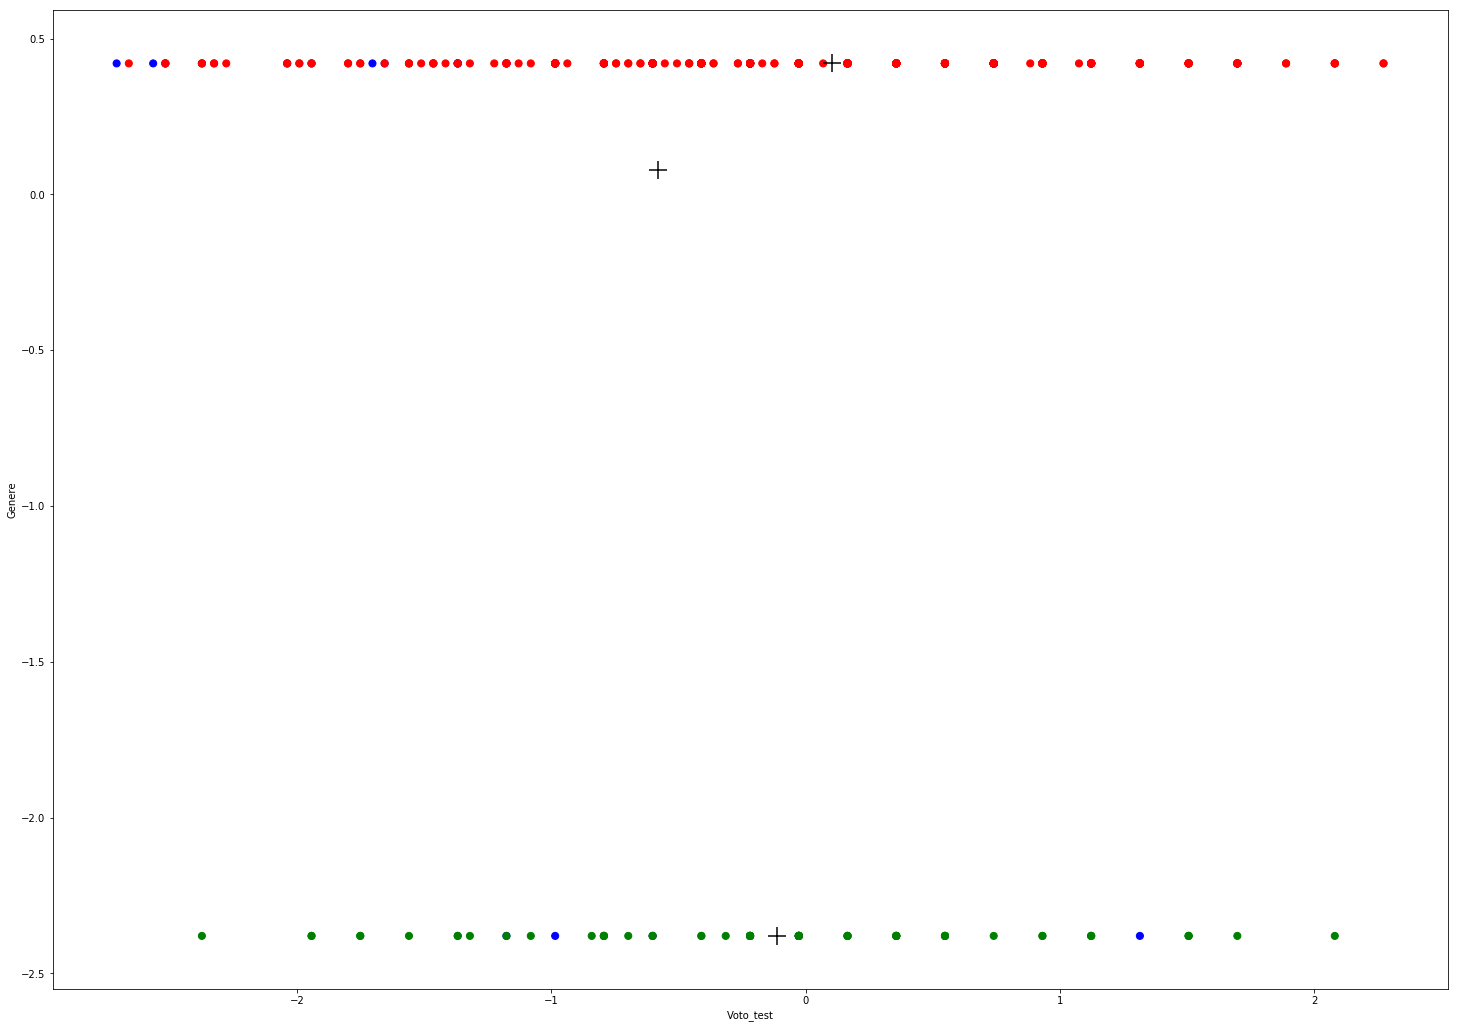

In [31]:
X = ds_clusterSchool.Voto_test
Y = ds_clusterSchool.Genere
#colors = np.array(["red","blue","green", "Yellow", "Pink","Brown","Grey"])
colors = np.array(["red","blue","green"])
#plt.scatter(ds.Voto_test, ds.AN1, c=colors[list(ds.cluster)], s=50)
plt.figure(figsize=(25,18))
plt.scatter(X, Y, c=colors[list(ds_clusterSchool.cluster)], s=50)
plt.scatter(centers.Voto_test, centers.Genere, linewidths=3, marker="+",s=300, c="black")
plt.xlabel("Voto_test")
plt.ylabel("Genere")

Text(0, 0.5, 'Genere')

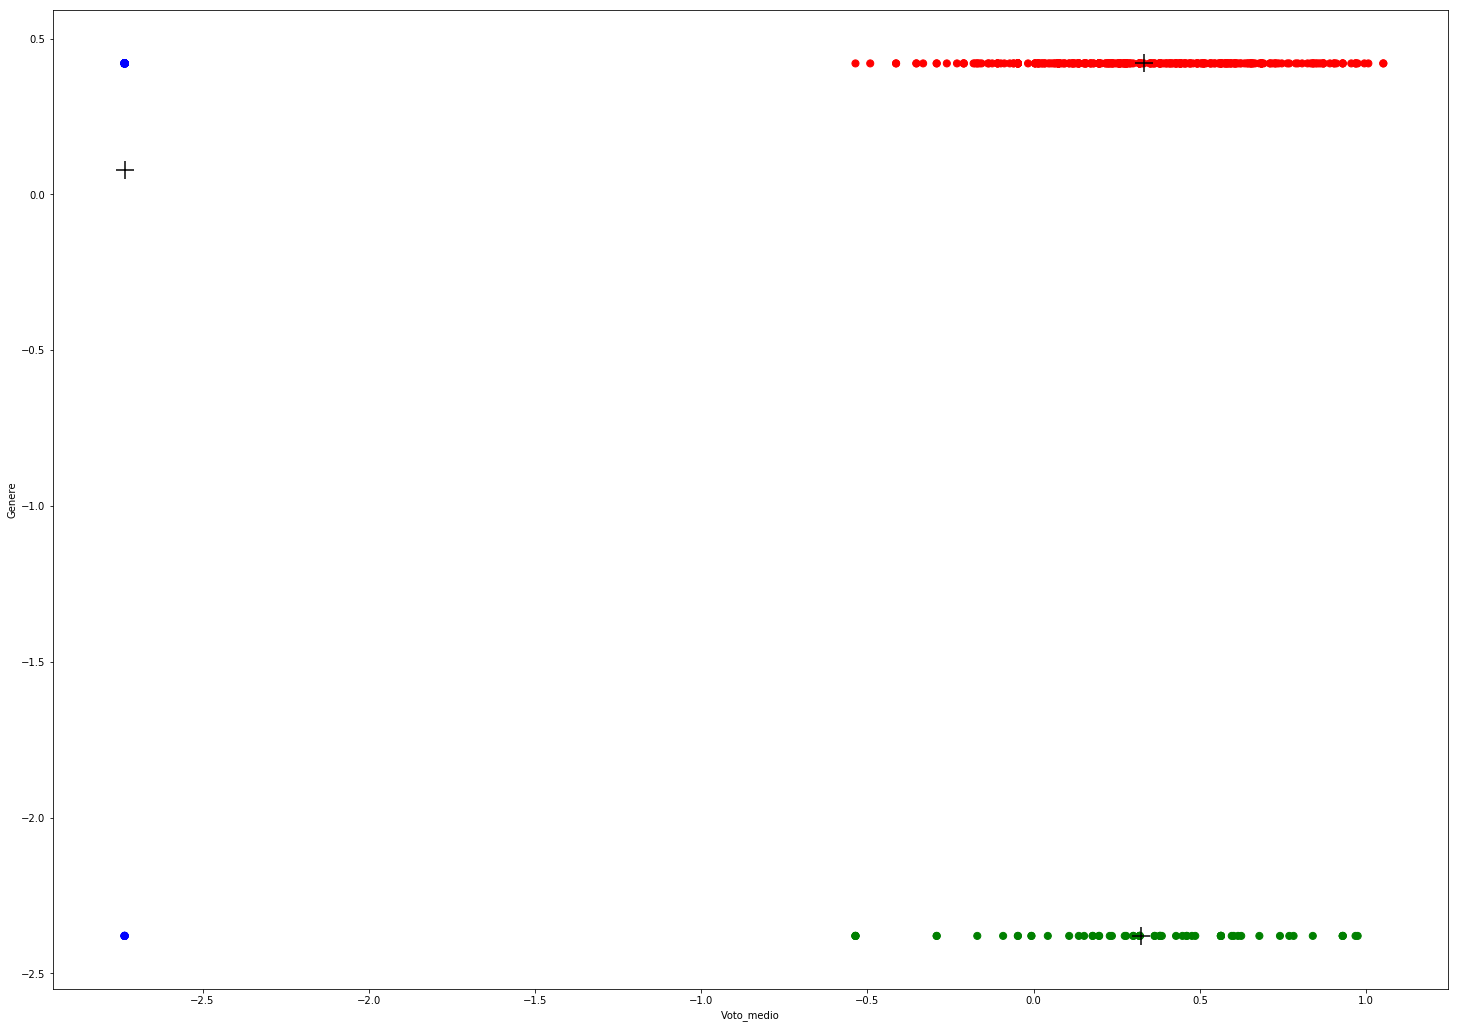

In [32]:
X = ds_clusterSchool.Voto_medio
Y = ds_clusterSchool.Genere
#colors = np.array(["red","blue","green", "Yellow", "Pink","Brown","Grey"])
colors = np.array(["red","blue","green"])
#plt.scatter(ds.Voto_test, ds.AN1, c=colors[list(ds.cluster)], s=50)
plt.figure(figsize=(25,18))
plt.scatter(X, Y, c=colors[list(ds_clusterSchool.cluster)], s=50)
plt.scatter(centers.Voto_medio, centers.Genere, linewidths=3, marker="+",s=300, c="black")
plt.xlabel("Voto_medio")
plt.ylabel("Genere")

In [33]:
ds_clusterSchool.head(20)

,Voto_test,Voto_medio,Genere,cluster
0,0.930673,-2.734545,0.420266,1
1,-0.027388,-2.734545,0.420266,1
2,0.355836,-2.734545,0.420266,1
3,0.739061,0.170970,0.420266,0
4,-2.518349,-2.734545,0.420266,1
5,-0.219001,-2.734545,-2.379446,1
6,-0.219001,-0.261322,0.420266,0
7,-0.027388,-0.060443,0.420266,0
8,-0.602225,-0.180824,0.420266,0
9,0.355836,0.379884,0.420266,0


In [34]:
ds_clusterSchool["Scuola_provenienza"] = ds.Scuola_provenienza

In [35]:
ds_clusterSchool.head(20)

,Voto_test,Voto_medio,Genere,cluster,Scuola_provenienza
0,0.930673,-2.734545,0.420266,1,1.201700
1,-0.027388,-2.734545,0.420266,1,0.723763
2,0.355836,-2.734545,0.420266,1,-0.710048
3,0.739061,0.170970,0.420266,0,0.723763
4,-2.518349,-2.734545,0.420266,1,-0.710048
5,-0.219001,-2.734545,-2.379446,1,0.723763
6,-0.219001,-0.261322,0.420266,0,-0.710048
7,-0.027388,-0.060443,0.420266,0,1.201700
8,-0.602225,-0.180824,0.420266,0,-1.665921
9,0.355836,0.379884,0.420266,0,1.201700


Il valore del coefficiente  di correlazione di CoPhenetic per clustering gerarchico con il metodo  complete  è  0.6614614627285125
La matrice delle distanze del clustering è:
 [1.36656536 2.21198273 9.71447571 ... 1.60810264 2.89325546 2.89325546]


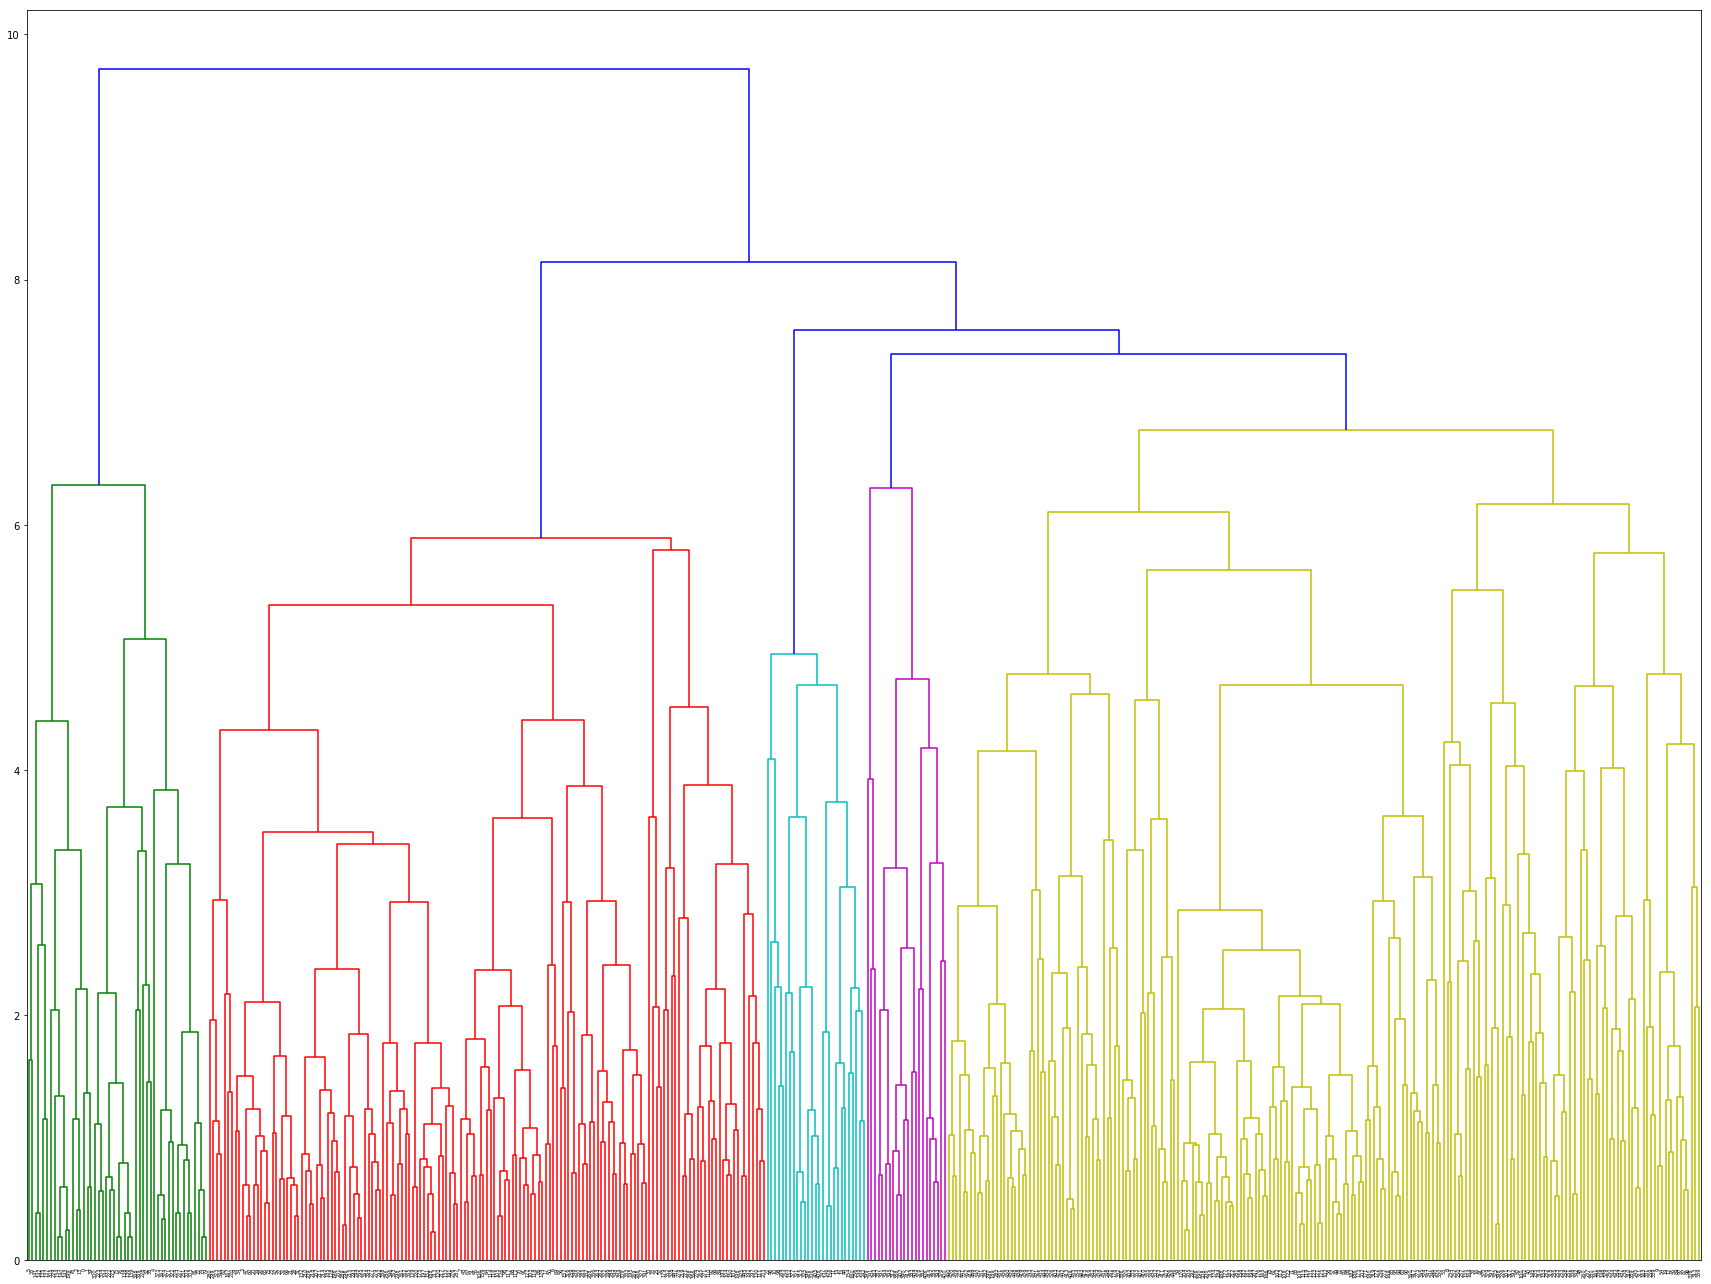

In [36]:
c_hierarchic_scipy(ds_clusterSchool,"complete")

In [37]:
labels = c_hierarchic_Sklearn(ds_clusterSchool, 4, "complete")

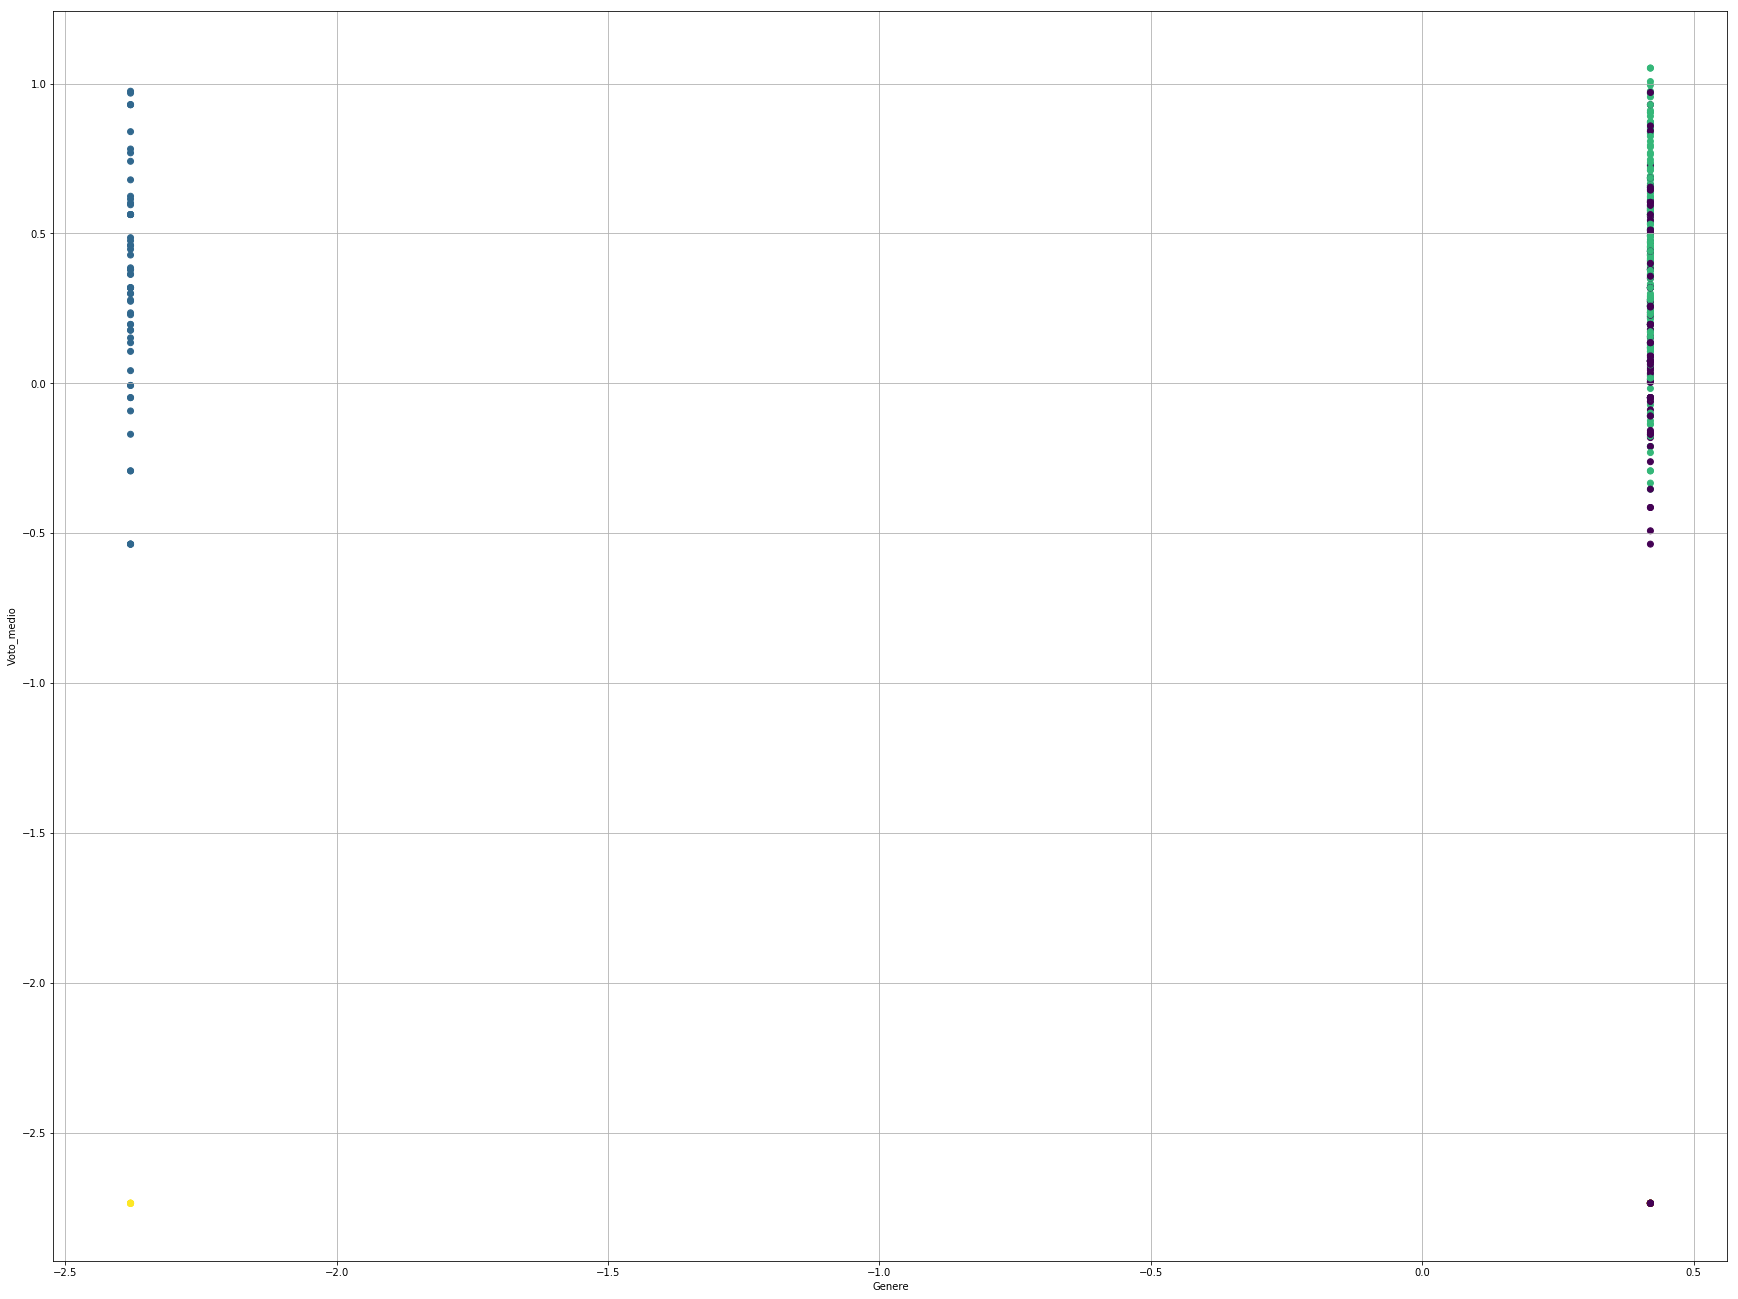

In [38]:
dataVizHierach(ds_clusterSchool.Genere, ds_clusterSchool.Voto_medio, labels)

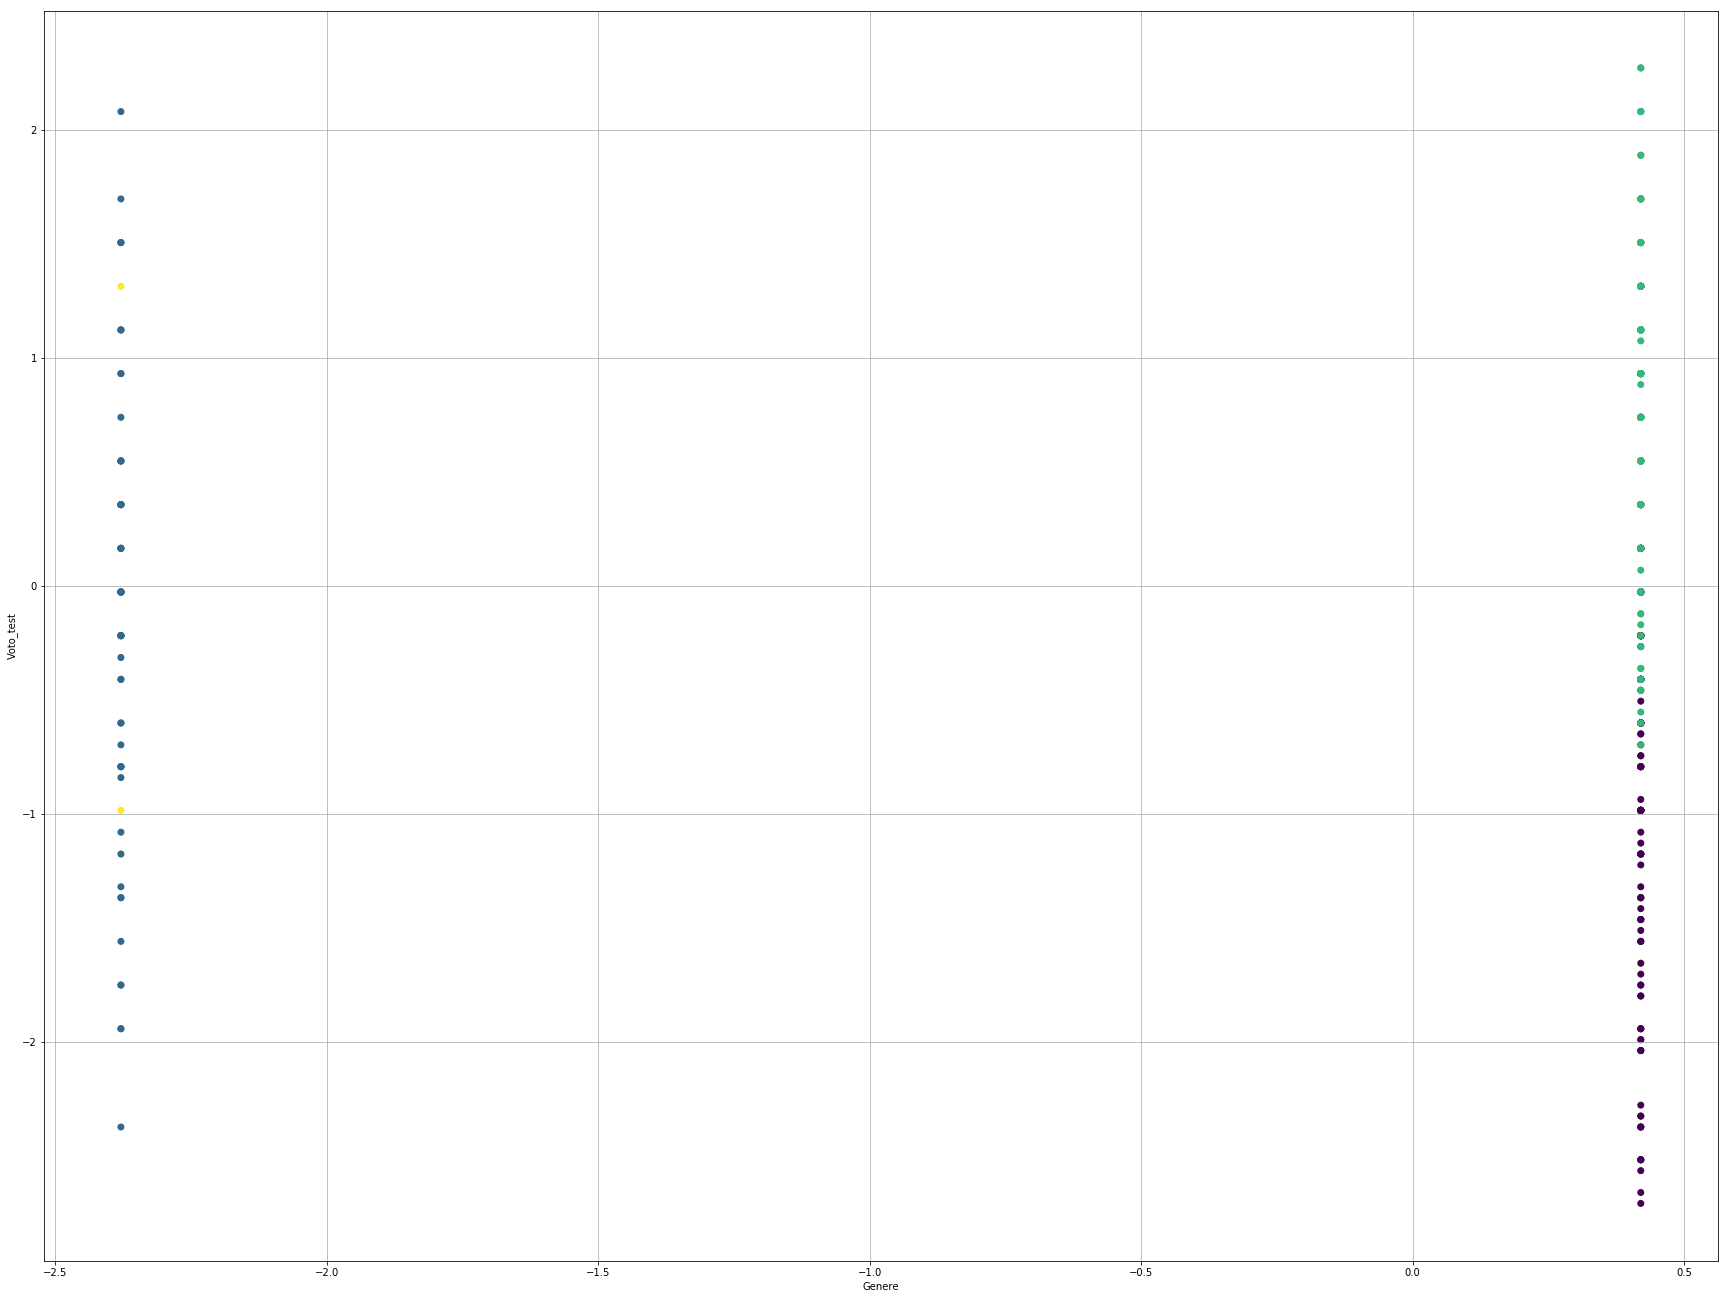

In [39]:
dataVizHierach(ds_clusterSchool.Genere, ds_clusterSchool.Voto_test, labels)

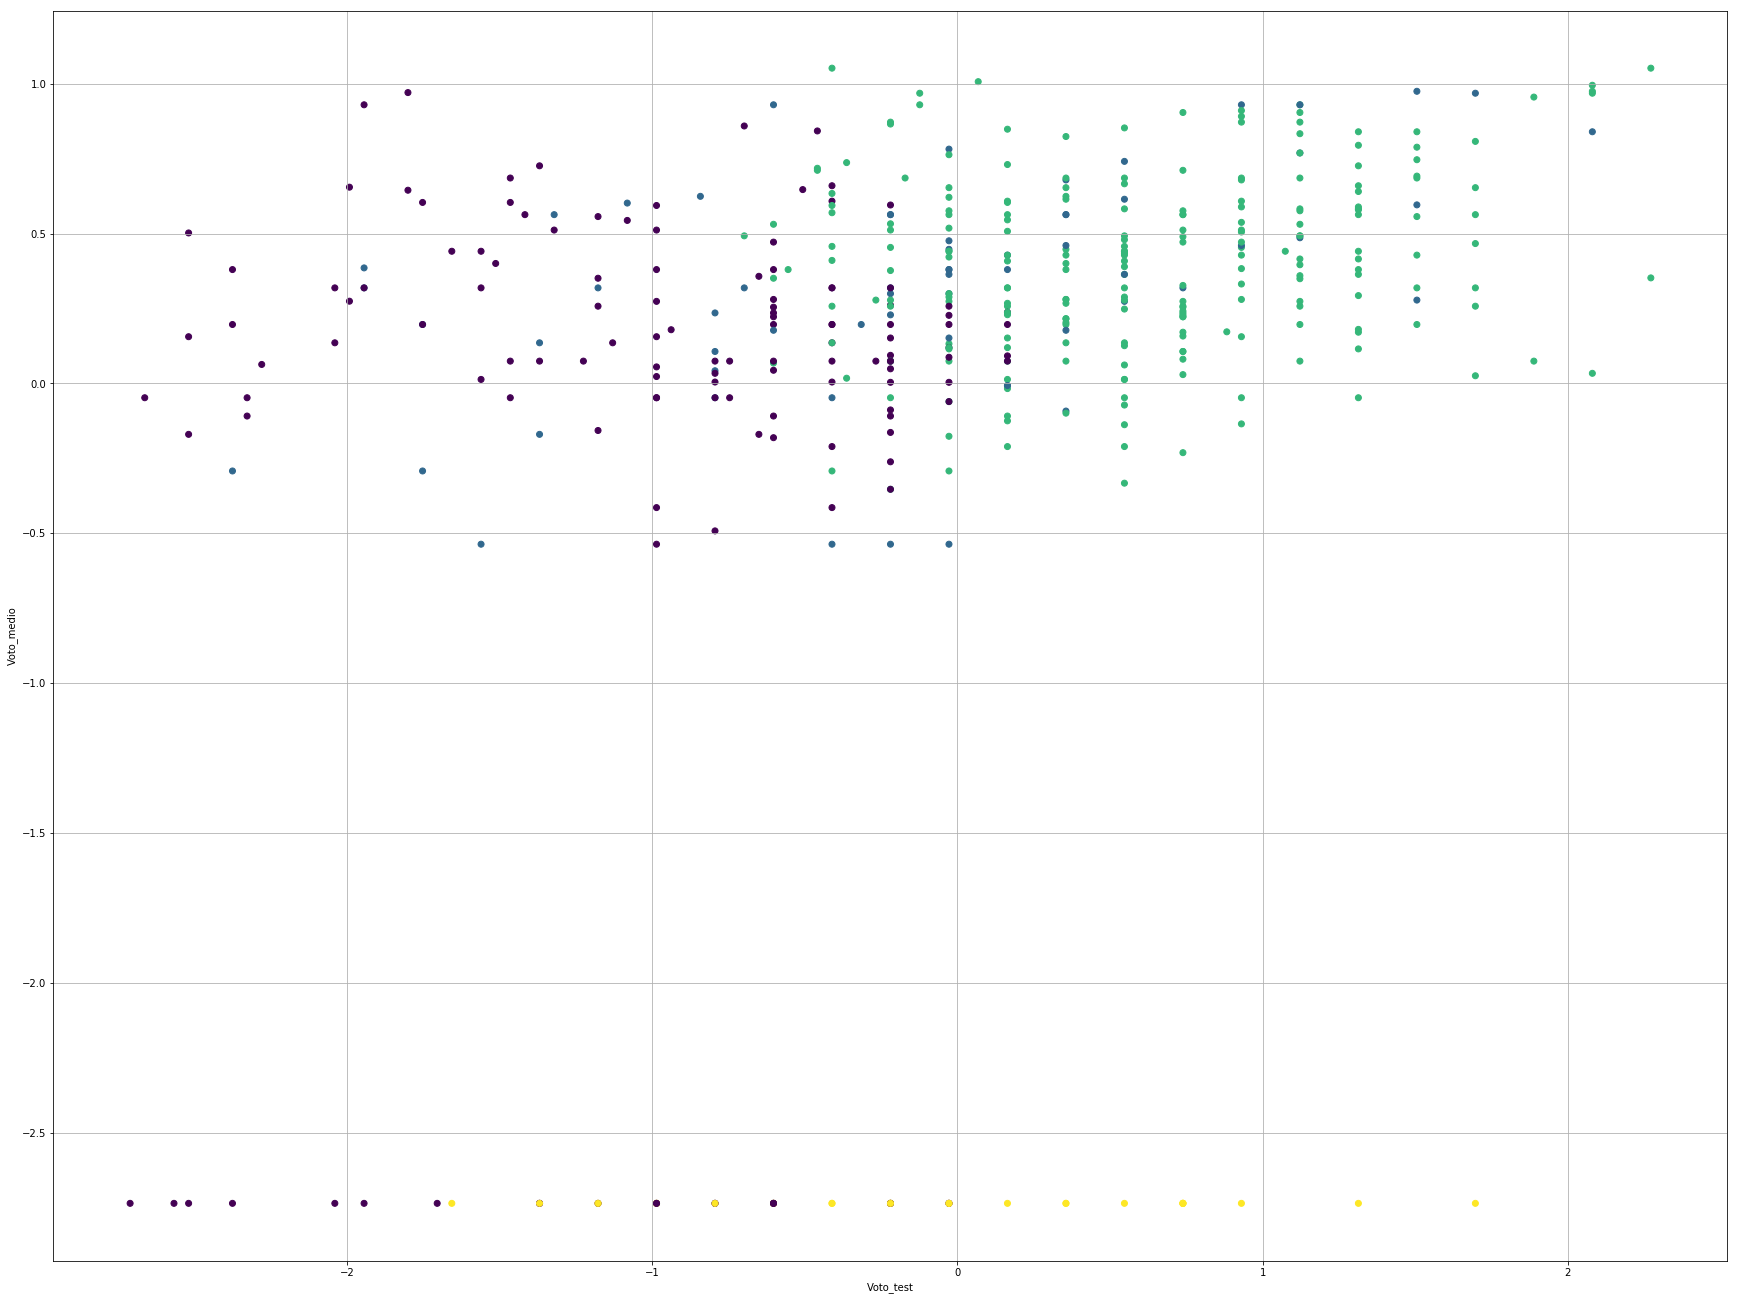

In [40]:
dataVizHierach(ds_clusterSchool.Voto_test, ds_clusterSchool.Voto_medio, labels)

Il valore massimo del coefficiente di silhouette è  0.529949832952587


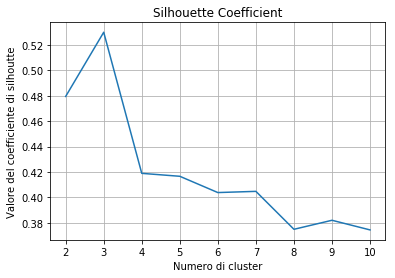

In [41]:
silhouette_Coefficient(ds_clusterSchool, 11, "k-means++")

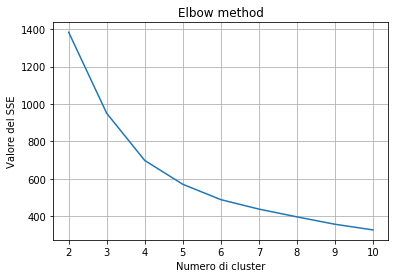

In [42]:
elbow_method(ds_clusterSchool, 11, "k-means++")

In [43]:
centroid, ds = kmeans(ds_clusterSchool, 3, "k-means++")

Valore SSE:  950.3471751712948
Numero di iterazioni 3


In [44]:
centroid.head()

,Voto_test,Voto_medio,Genere,Scuola_provenienza
cluster,,,,
0,0.103575,0.333028,0.420266,-0.103543
1,-0.113150,0.324148,-2.379446,0.469377
2,-0.579740,-2.734545,0.077444,0.128780


In [45]:
ds.head()

,Voto_test,Voto_medio,Genere,cluster,Scuola_provenienza
0,0.930673,-2.734545,0.420266,2,1.201700
1,-0.027388,-2.734545,0.420266,2,0.723763
2,0.355836,-2.734545,0.420266,2,-0.710048
3,0.739061,0.170970,0.420266,0,0.723763
4,-2.518349,-2.734545,0.420266,2,-0.710048


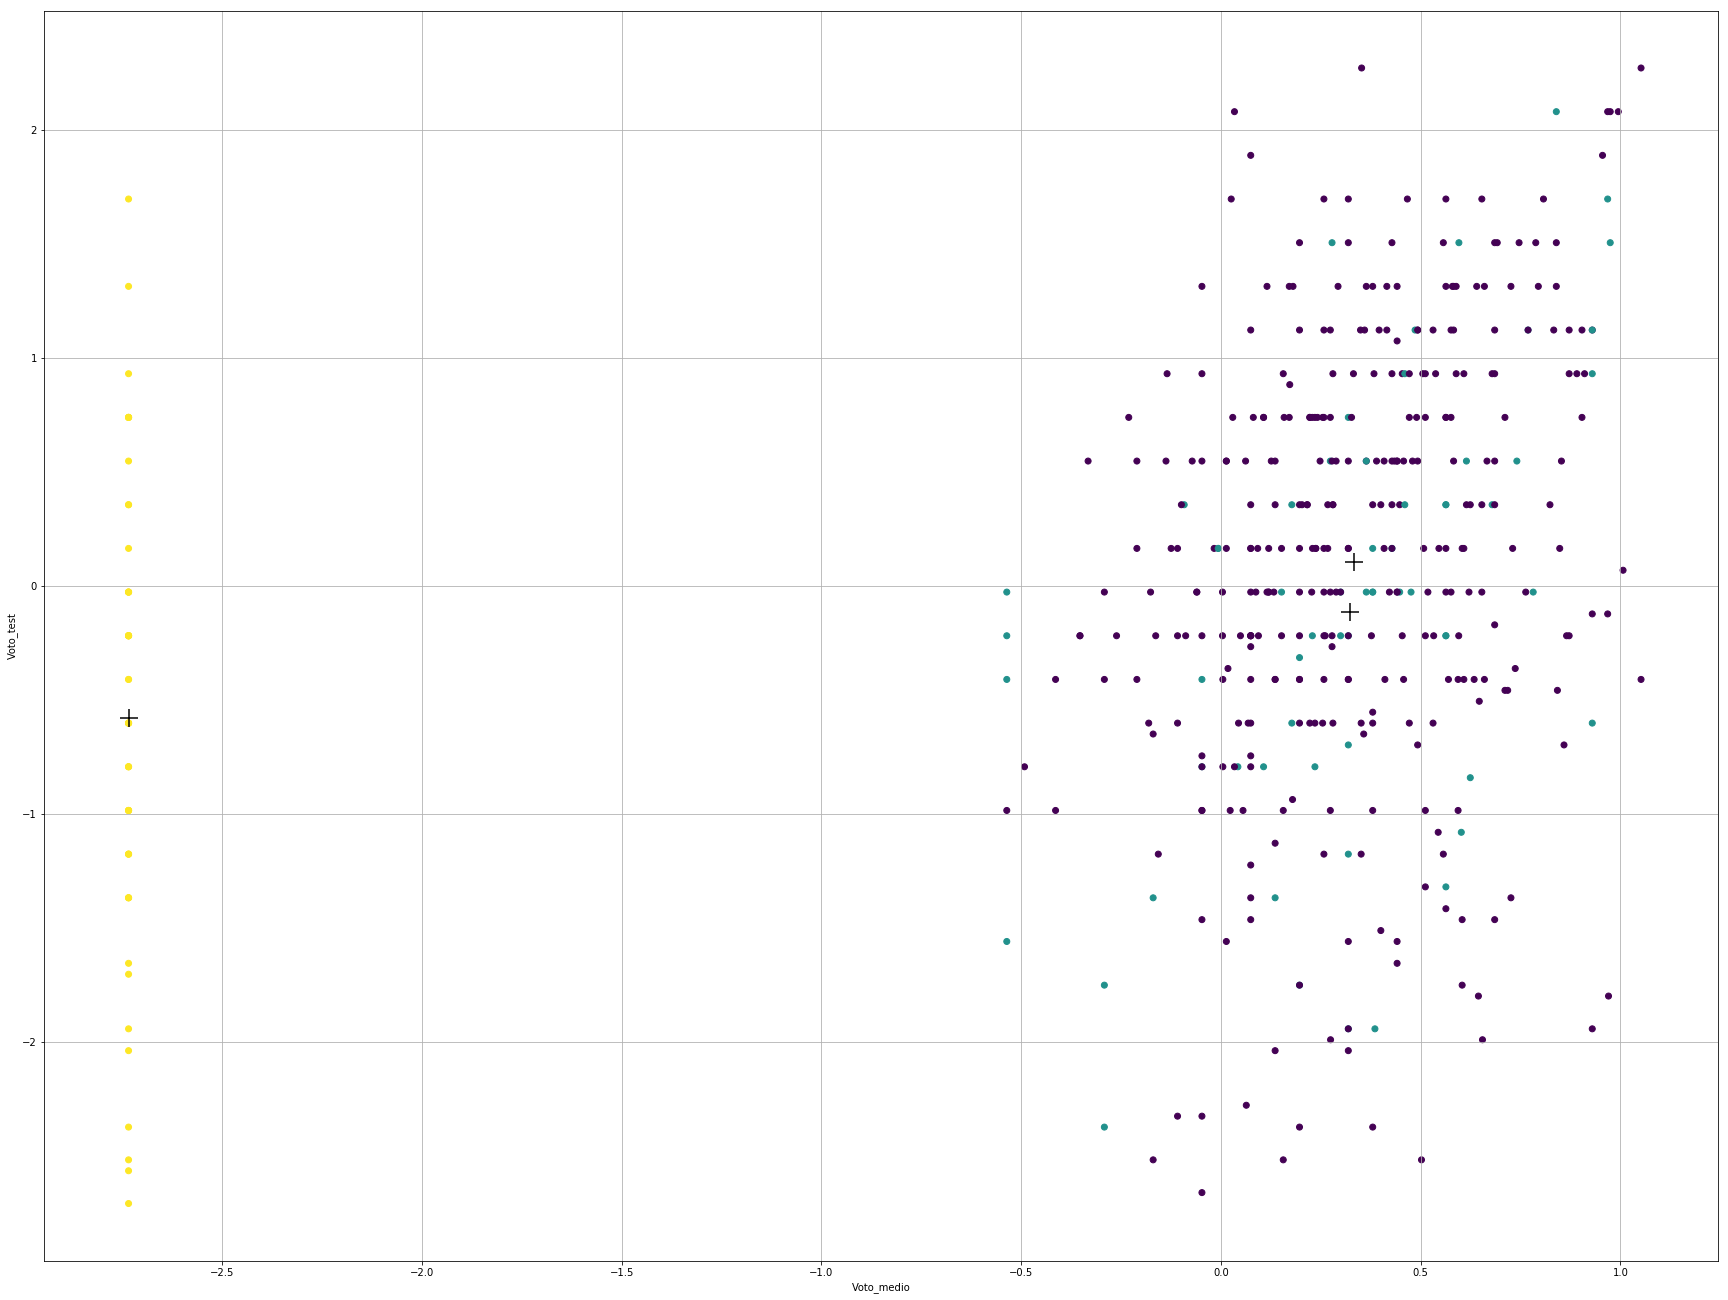

In [46]:
dataVizKmeans(ds.Voto_medio, ds.Voto_test, centroid.Voto_medio, centroid.Voto_test, ds.cluster)

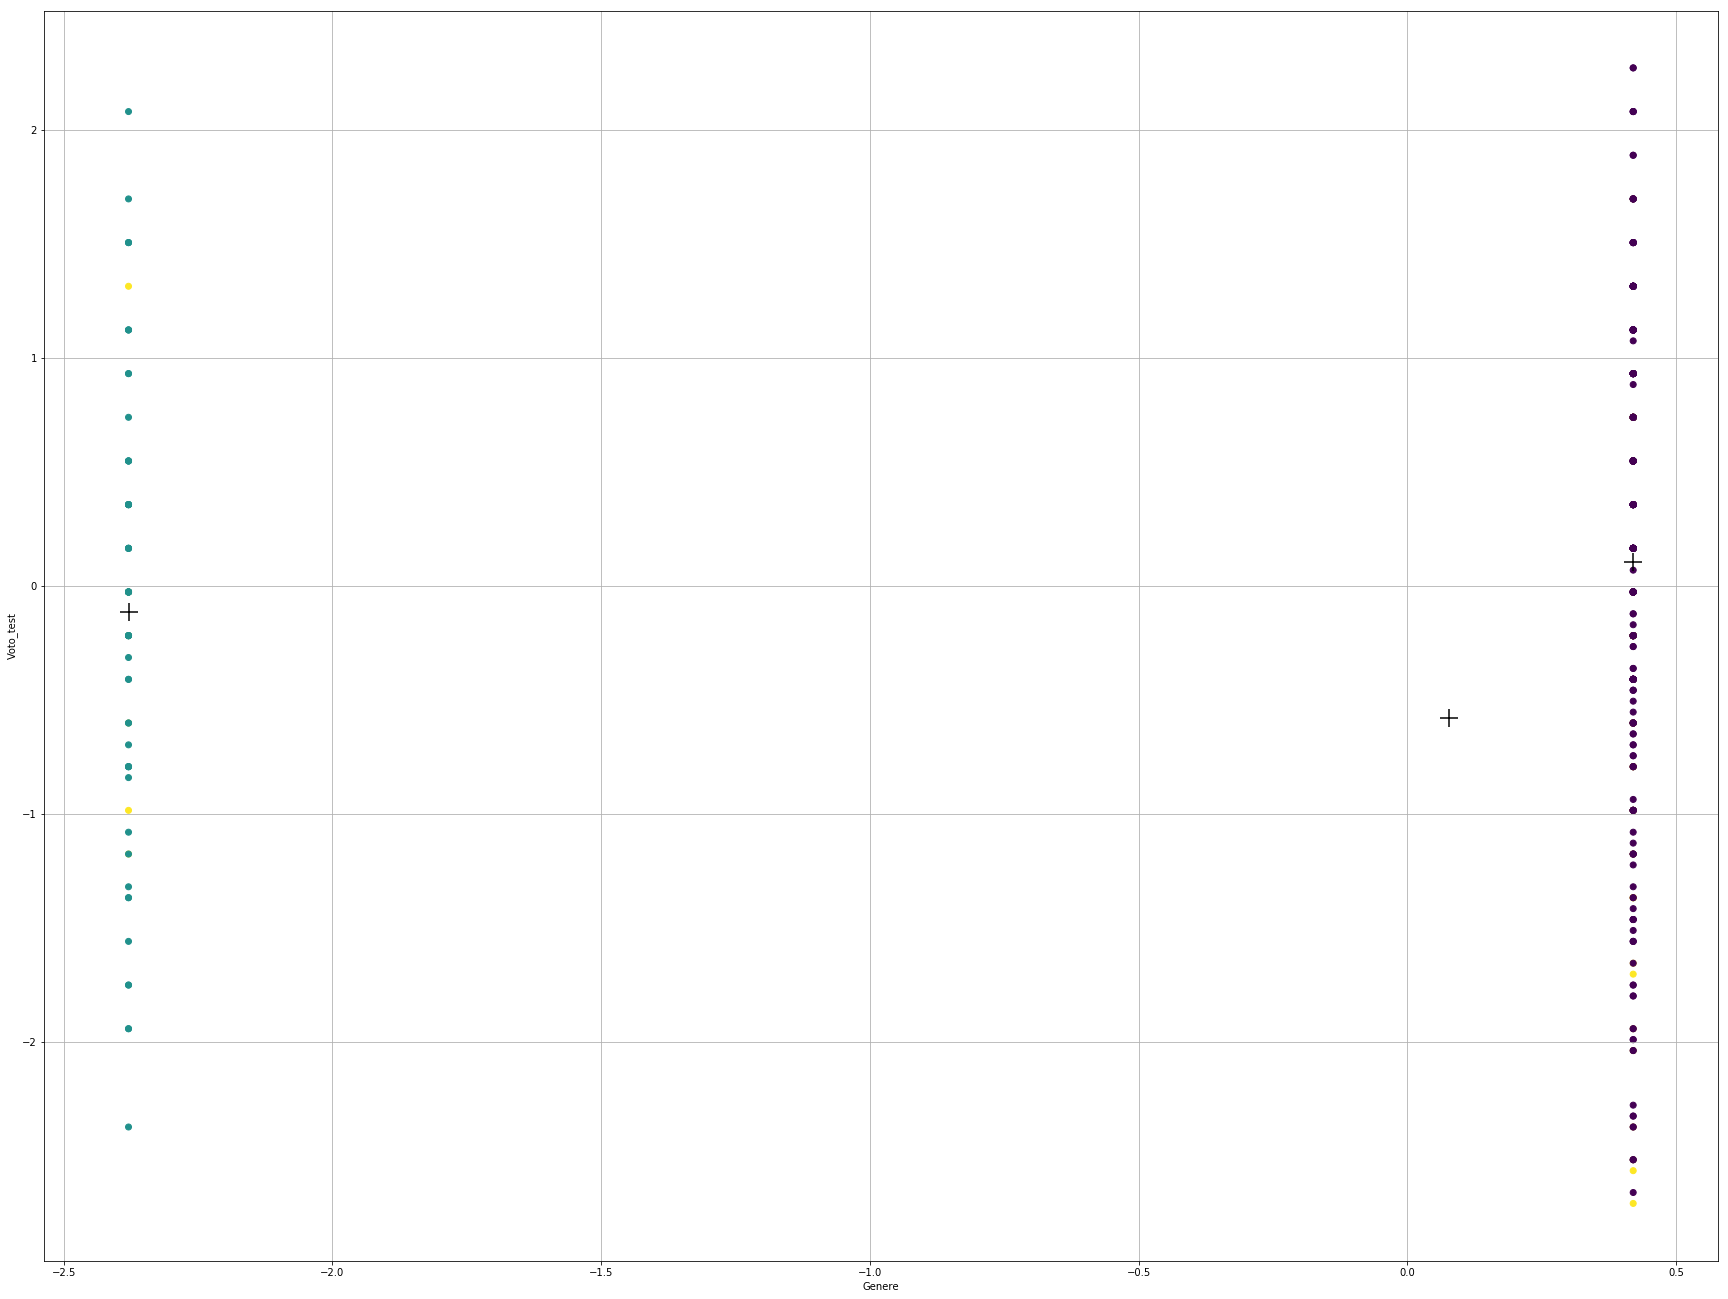

In [47]:
dataVizKmeans(ds.Genere, ds.Voto_test, centroid.Genere, centroid.Voto_test, ds.cluster)

In [48]:
dbscan = dbScan(ds_clusterSchool, 2.5, 10)

clustering information  DBSCAN(algorithm='auto', eps=2.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)


In [49]:
dbscan.head(50)

,Voto_test,Voto_medio,Genere,cluster,Scuola_provenienza
0,0.930673,-2.734545,0.420266,0,1.201700
1,-0.027388,-2.734545,0.420266,0,0.723763
2,0.355836,-2.734545,0.420266,0,-0.710048
3,0.739061,0.170970,0.420266,0,0.723763
4,-2.518349,-2.734545,0.420266,0,-0.710048
5,-0.219001,-2.734545,-2.379446,1,0.723763
6,-0.219001,-0.261322,0.420266,0,-0.710048
7,-0.027388,-0.060443,0.420266,0,1.201700
8,-0.602225,-0.180824,0.420266,0,-1.665921
9,0.355836,0.379884,0.420266,0,1.201700


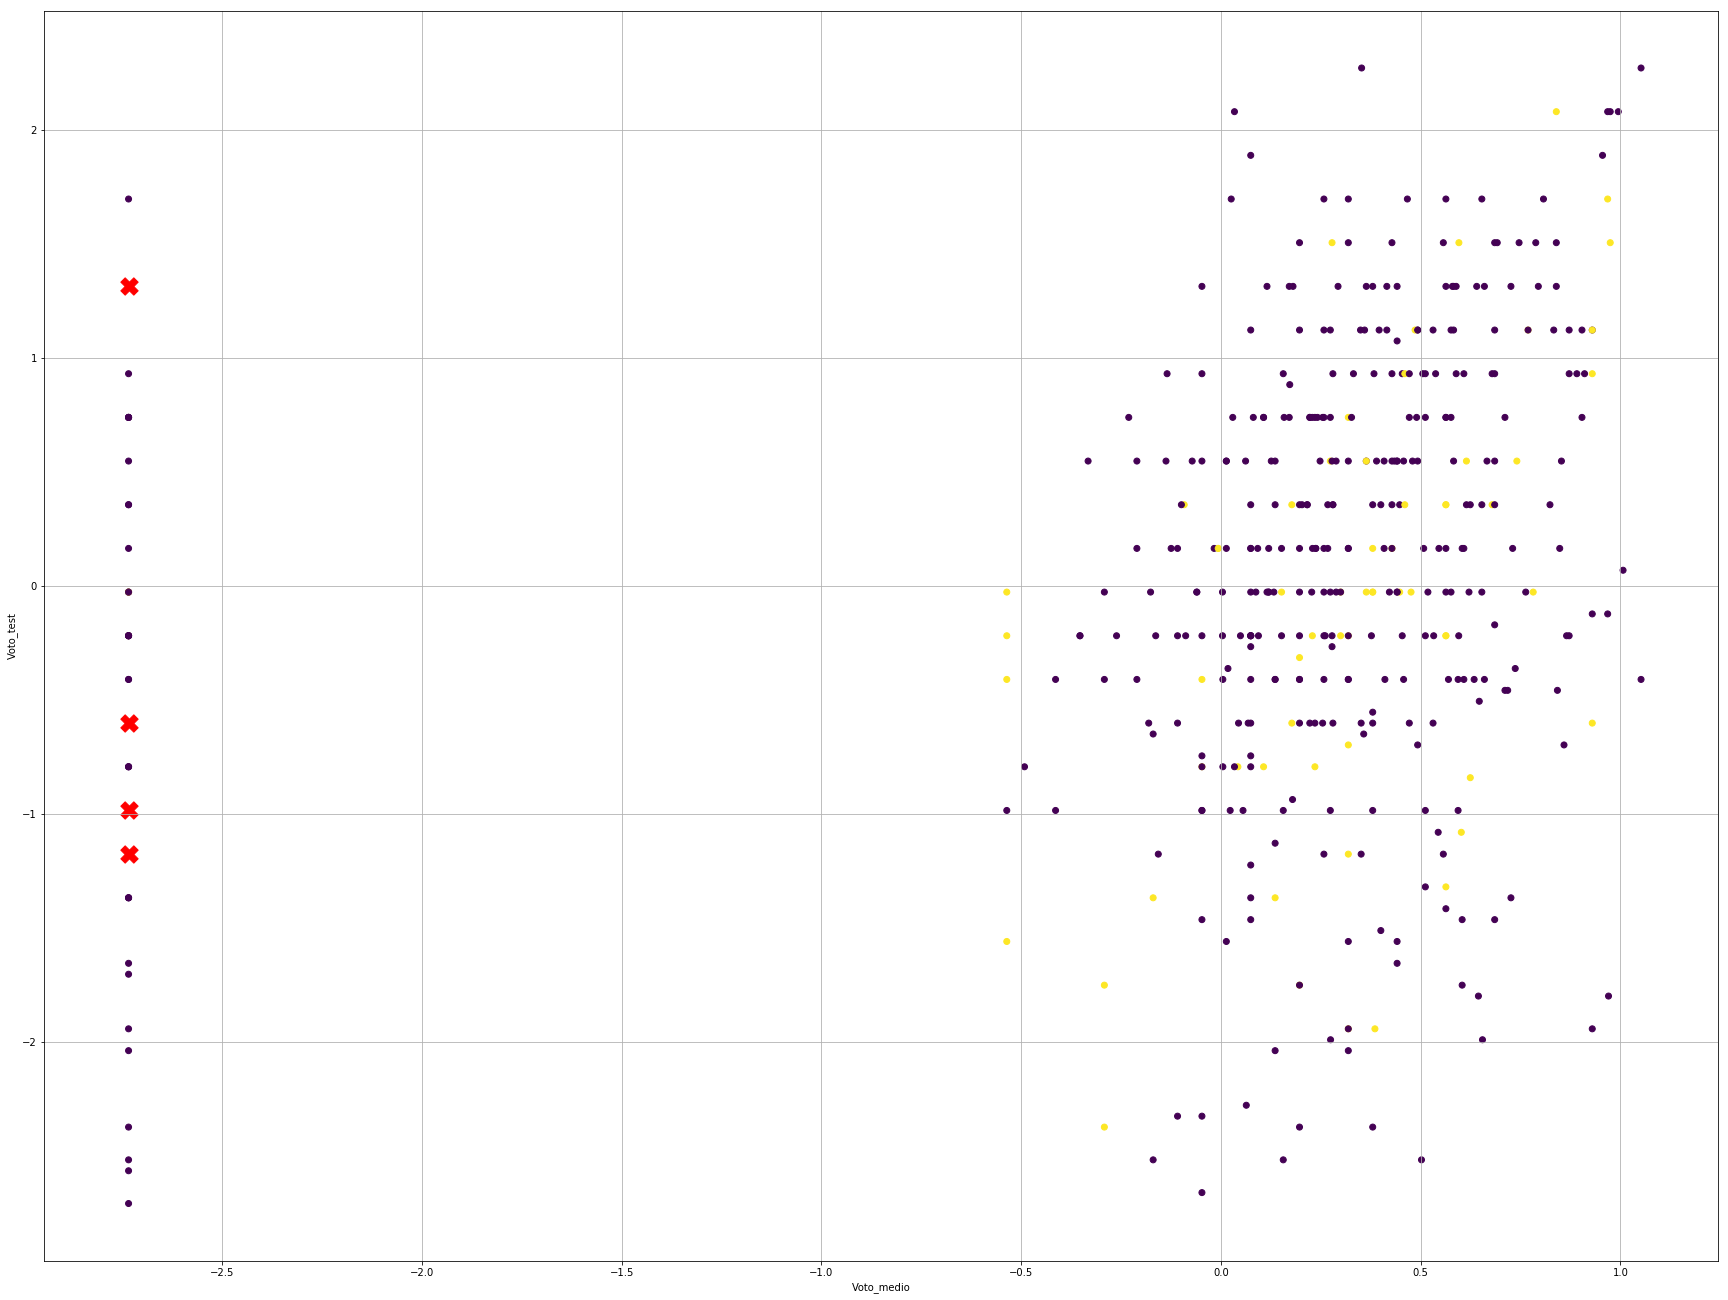

In [50]:
dataVizDBscan(dbscan, "Voto_medio", "Voto_test")

In [51]:
plt.plot(list(range(1,len(distanceDec)+1)), distanceDec)

NameError: name 'distanceDec' is not defined

In [ ]:
indices

In [ ]:
findParamerDBScan(ds,6)

In [ ]:
ds

In [ ]:
x =ds.drop("Genere", axis=1).values

In [ ]:
x

In [ ]:
ds

In [ ]:
Y = ds["Genere"].values

In [ ]:
Y